In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
url = '/Users/javi/Desktop/dsfvfvdv/amz_uk_star_prediction_dataset.csv'
df = pd.read_csv(url)

In [55]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [5]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')]

In [9]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Top 5 values from the frequency table
top_5_frequency = frequency_table.head(5)

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

# Top 5 values from the proportion table
top_5_proportion = proportion_table.head(5)

top_5_frequency, top_5_proportion


(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
 Name: count, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
 Name: proportion, dtype: float64)

In [8]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

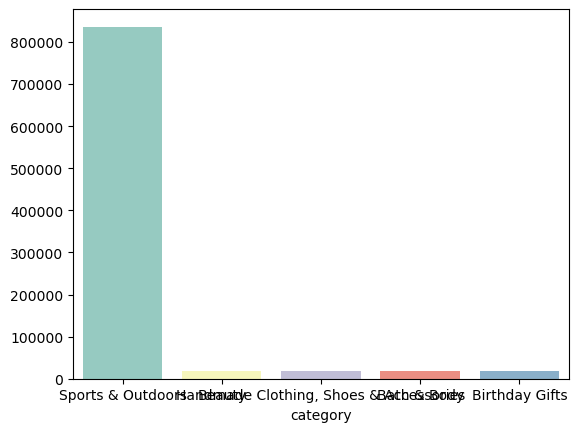

In [11]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=top_5_frequency.index, y=top_5_frequency.values, palette="Set3");

<Axes: ylabel='count'>

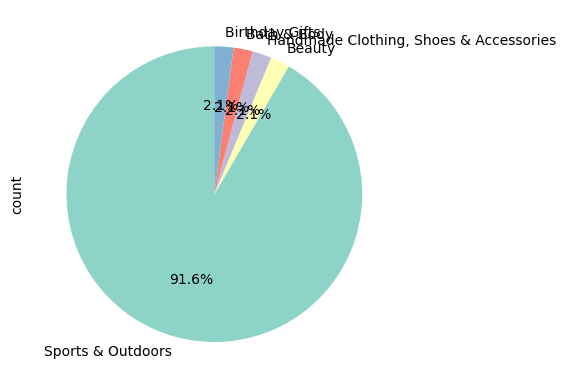

In [18]:
# Plotting a pie chart of the 'MSZoning' column value counts, with percentage labels, 
# starting at angle 90, and using colors from the "Set3" Seaborn palette
df['category'].value_counts().head().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

# Sports & Outdoors dominate 34.2% and in the top 5 as 91.6%

In [24]:
df_prices = df['price'].describe().round(2)
df_prices

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [60]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

In [61]:
# Output of describe() for 'price'
price_describe = df['price'].describe()

# Extracting the required measures
price_range = price_describe['max'] - price_describe['min']
price_std = price_describe['std']
price_iqr = price_describe['75%'] - price_describe['25%']

# Print the results
print("Range:", price_range)
print("Standard Deviation:", price_std)
print("Interquartile Range (IQR):", price_iqr)


Range: 100000.0
Standard Deviation: 345.6088617535223
Interquartile Range (IQR): 36.0


/Users/javi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

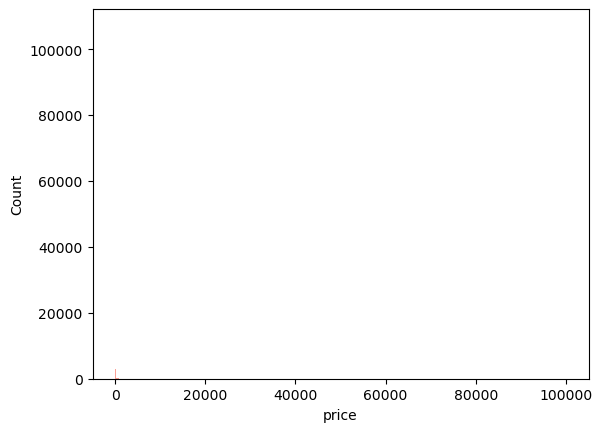

In [53]:
sns.histplot(df['price'], kde=False, bins=100000, color="salmon")
# the price range is so hihgh that it´s hard to be able to read the amount of low prices

<Axes: >

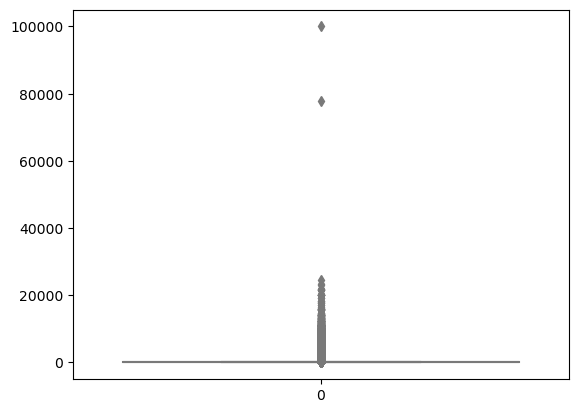

In [47]:
# Plotting a boxplot for the 'price' column with a light blue color
sns.boxplot(data = df['price'], color="lightblue")
#the 100000€ price range makes it hard to read the bar plots and box plots since most of the prices are around 90 

In [56]:
df_stars_describe = df['stars'].describe().round(2)
df_stars_describe

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

In [62]:
# Output of describe() for 'stars'
stars_describe = df['stars'].describe()

# Extracting the required measures
stars_range = stars_describe['max'] - stars_describe['min']
stars_std = stars_describe['std']
stars_iqr = stars_describe['75%'] - stars_describe['25%']

# Print the results
print("Range:", stars_range)
print("Standard Deviation:", stars_std)
print("Interquartile Range (IQR):", stars_iqr)


Range: 5.0
Standard Deviation: 2.1948653785054697
Interquartile Range (IQR): 4.4


In [65]:
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

/Users/javi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

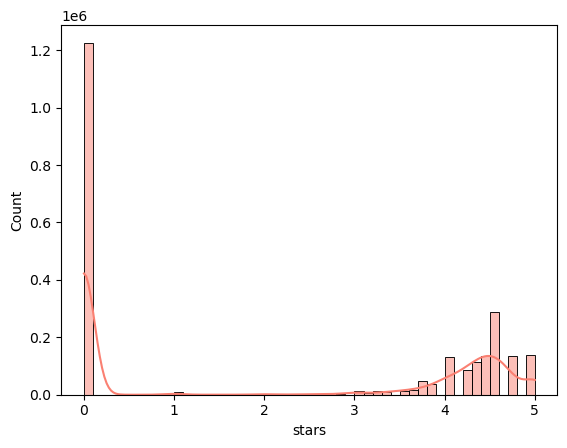

In [80]:

# Create the histogram plot
sns.histplot(df['stars'], kde=True, bins=50, color="salmon")

<Axes: >

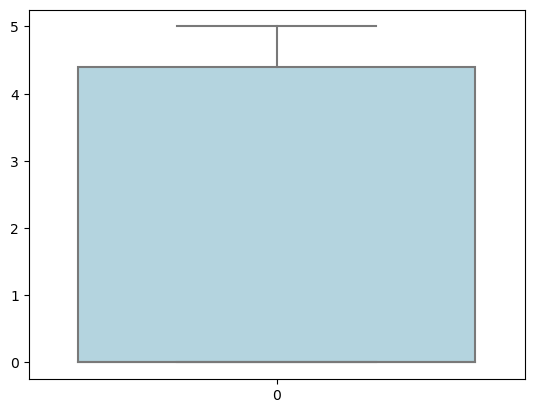

In [75]:
# Plotting a boxplot for the 'stars' column with a light blue color
sns.boxplot(data = df['stars'], color="lightblue")
# I don´t really see central but the mode indicates that it´s probably very close to 0 we would have to ignore 0 to take a correct measurement of things

In [77]:
from scipy.stats import skew, kurtosis

skewness_price = df['stars'].skew()
kurtosis_price = df['stars'].kurtosis()

skewness_price, kurtosis_price



(0.08120735761080985, -1.9260061280432985)


Skewness: The skewness value of approximately 0.081 indicates a very slight right skewness. This means that the distribution of ratings is slightly asymmetrical, with a slightly longer tail on the right side. In other words, there might be a few more higher ratings compared to lower ones, but the skewness is very close to 0, suggesting a nearly symmetrical distribution.
Kurtosis: The kurtosis value of approximately -1.926 indicates a negative kurtosis. This means that the distribution has lighter tails than a normal distribution (platykurtic). A negative kurtosis suggests that the distribution is less peaked and more spread out than a normal distribution. In the context of ratings, this could indicate that the ratings are more spread out and have fewer extreme values (both very high and very low ratings) compared to a normal distribution.